# SMS Spam 분류

## Column 설명

- v1: label ['ham', 'spam']
- v2: raw text
- Unnamed: 2: 불필요한 데이터
- Unnamed: 3: 불필요한 데이터
- Unnamed: 4: 불필요한 데이터

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
from nltk import Text
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
from wordcloud import WordCloud

In [6]:
df = pd.read_csv('csvs/spam.csv', encoding='latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
# v1 => label, v2 => 'text' 알아보기 쉽게 변경
df.columns = ['label', 'text']
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df[df['text'].str.contains('&lt;#&gt;')]

,label,text
44,ham,Great! I hope you like your man well endowed. ...
51,ham,"A gram usually runs like &lt;#&gt; , a half e..."
78,ham,Does not operate after &lt;#&gt; or what
177,ham,Turns out my friends are staying for the whole...
199,ham,"Found it, ENC &lt;#&gt; , where you at?"
...,...,...
5478,ham,No probably &lt;#&gt; %.
5504,ham,Wait . I will msg after &lt;#&gt; min.
5513,ham,Yes. Please leave at &lt;#&gt; . So that at ...
5557,ham,No. I meant the calculation is the same. That ...


In [10]:
df.iloc[24]['text']

'Ffffffffff. Alright no way I can meet up with you sooner?'

In [11]:
df.isna().sum()

label    0
text     0
dtype: int64

In [12]:
df.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

<AxesSubplot:>

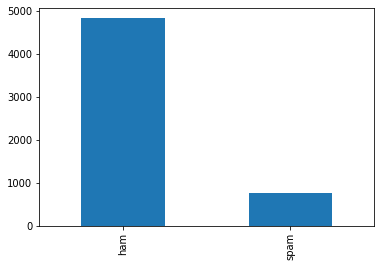

In [14]:
df['label'].value_counts().plot(kind='bar')

In [15]:
reg_token = RegexpTokenizer('[\w]+')

In [16]:
# 불용언 처리
stop_words = stopwords.words('english')
stop_words.append('lt')
stop_words.append('gt')
lemmatizer = WordNetLemmatizer()

result = []
ham_texts = []
spam_texts = []
for index, (text, label) in enumerate(zip(df['text'], df['label'])):
    word_tokens = reg_token.tokenize(text)
    result.append([])

    for word in word_tokens:
        if word not in stop_words:
            temp = lemmatizer.lemmatize(word)
            result[index].append(temp)

            if label == 'ham':
                ham_texts.append(temp.lower())
            else:
                spam_texts.append(temp.lower())

df['token'] = result
df[:5]

,label,text,token
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, think, go, usf, life, around, though]"


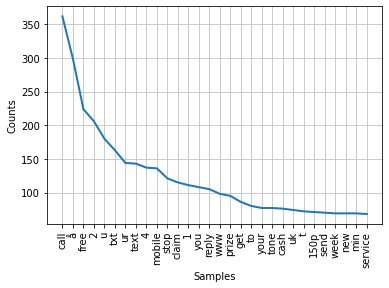

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [17]:
# spam SMS 많이 등장한 token 상위 30개
# call, free, www, prize, cash, win, urgent, now...
Text(spam_texts).plot(30)

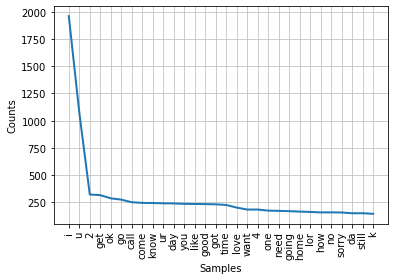

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [18]:
# ham SMS 많이 등장한 token 상위 30개
# go, good, come, love, home, want, sorry...
Text(ham_texts).plot(30)

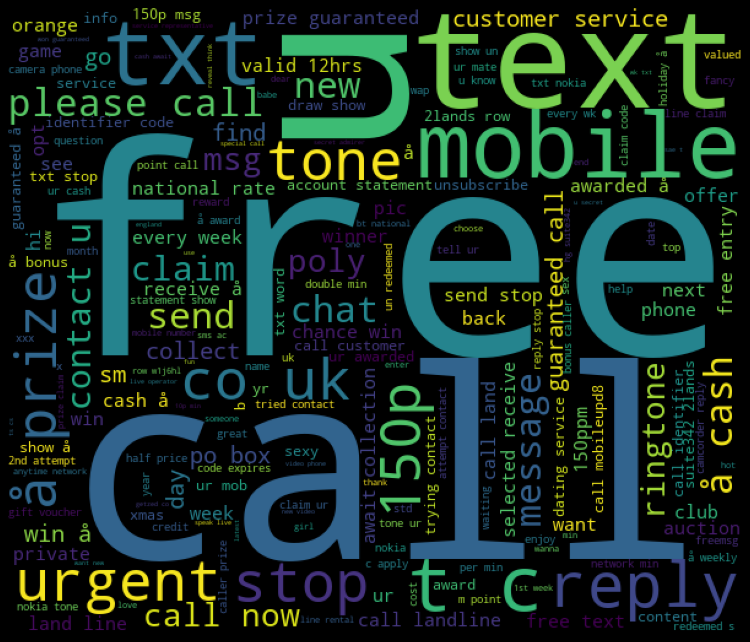

In [19]:
# spam sms 시각화
cloud = WordCloud(width=600, height=512).generate(' '.join(spam_texts))
plt.figure(figsize=(13, 9), facecolor='k')
plt.imshow(cloud)
plt.axis('off')
plt.tight_layout(pad=1)
plt.show()

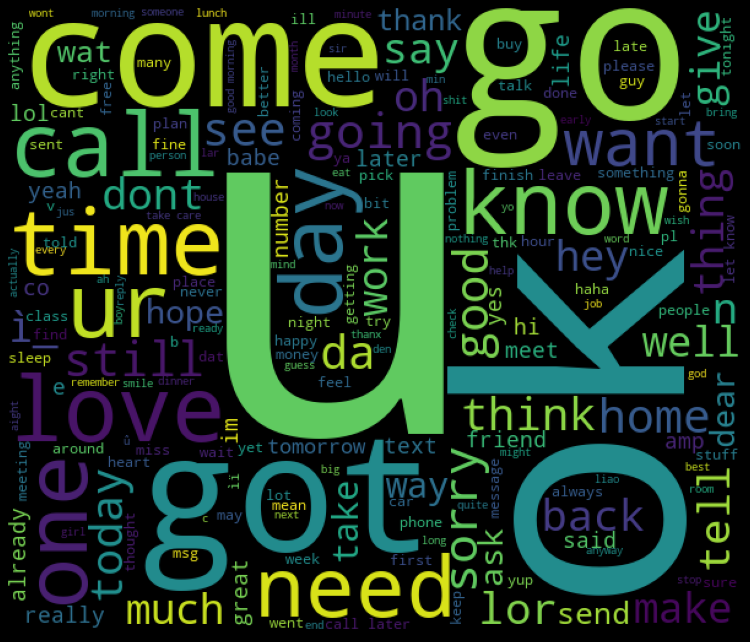

In [20]:
# ham sms 시각화
cloud = WordCloud(width=600, height=512).generate(' '.join(ham_texts))
plt.figure(figsize=(13, 9), facecolor='k')
plt.imshow(cloud)
plt.axis('off')
plt.tight_layout(pad=1)
plt.show()

In [21]:
df['spam'] = df['label'].apply(lambda x: 1 if x == 'spam' else 0)
df[:5]

,label,text,token,spam
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, jurong, point, crazy, Available, bugis, n...",0
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]",0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin...",1
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, early, hor, U, c, already, say]",0
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, think, go, usf, life, around, though]",0


In [22]:
cv = CountVectorizer()
X = cv.fit_transform(df['text']).toarray()
y = df['spam']

In [31]:
cv.vocabulary_

{'go': 3550,
 'until': 8030,
 'jurong': 4350,
 'point': 5920,
 'crazy': 2327,
 'available': 1303,
 'only': 5537,
 'in': 4087,
 'bugis': 1751,
 'great': 3634,
 'world': 8489,
 'la': 4476,
 'buffet': 1749,
 'cine': 2048,
 'there': 7645,
 'got': 3594,
 'amore': 1069,
 'wat': 8267,
 'ok': 5504,
 'lar': 4512,
 'joking': 4318,
 'wif': 8392,
 'oni': 5533,
 'free': 3358,
 'entry': 2949,
 'wkly': 8447,
 'comp': 2165,
 'to': 7756,
 'win': 8405,
 'fa': 3087,
 'cup': 2386,
 'final': 3207,
 'tkts': 7743,
 '21st': 411,
 'may': 4930,
 '2005': 402,
 'text': 7595,
 '87121': 784,
 'receive': 6297,
 'question': 6190,
 'std': 7230,
 'txt': 7933,
 'rate': 6242,
 'apply': 1156,
 '08452810075over18': 77,
 'dun': 2802,
 'say': 6633,
 'so': 7024,
 'early': 2823,
 'hor': 3927,
 'already': 1042,
 'then': 7640,
 'nah': 5238,
 'don': 2712,
 'think': 7660,
 'he': 3781,
 'goes': 3558,
 'usf': 8075,
 'lives': 4665,
 'around': 1207,
 'here': 3831,
 'though': 7680,
 'freemsg': 3365,
 'hey': 3841,
 'darling': 2443,
 'it

In [24]:
X[:5], y[:5]

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 0    0
 1    0
 2    1
 3    0
 4    0
 Name: spam, dtype: int64)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=777,
                                                    stratify=df['spam'])

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1114, 8672)
(4458, 8672)
(1114,)
(4458,)


In [27]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100,
                                oob_score=True,
                                random_state=527).fit(X_train, y_train)

In [28]:
y_predict = forest.predict(X_test)

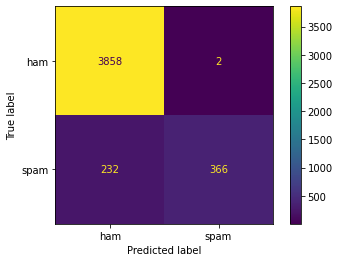

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['ham', 'spam'])
disp.plot()

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# 정확도
print(accuracy_score(y_test, y_predict))
# 정밀도
print(precision_score(y_test, y_predict))
# 재현율
print(recall_score(y_test, y_predict))

0.9475100942126514
0.9945652173913043
0.6120401337792643
